In [1]:
# 664 food and costs
# May 7
# Charts with plotly
# Network chart

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx

#dataset previously used in Info658 to work with Gephi
df_nodes = pd.read_csv('/Users/aliceviggiani/Dropbox/1 estudos/5 data viz/0 master/pratt/2 2025 spring/658-infovis/0 assignments/5 gephi report/0 raw/658-nutrition-emssion-nodes-7.csv')
df_edges = pd.read_csv('/Users/aliceviggiani/Dropbox/1 estudos/5 data viz/0 master/pratt/2 2025 spring/658-infovis/0 assignments/5 gephi report/0 raw/658-nutrition-emssion-edges-9.csv')

df_edges

,source,target,weight,weight_legend,protein_source,protein_target,sum_protein
0,Almonds,Yogurt,1,Acceptable pairing or complementary nutrition,21.4,3.8,25.2
1,Bacon,Egg,3,Strong classic combination,40.9,12.4,53.3
2,Beans,Butter,3,Strong classic combination,26.8,1.0,27.8
3,Beans,Pork sausage,2,Good synergy or common usage,26.8,18.2,45.0
4,Beans,Chicken wing,1,Acceptable pairing or complementary nutrition,26.8,23.4,50.2
5,Beef steak,Butter,2,Good synergy or common usage,18.7,1.0,19.7
6,Blue cheese,Walnuts,3,Strong classic combination,21.4,14.6,36.0
7,Brie,Walnuts,3,Strong classic combination,20.8,14.6,35.4
8,Butter,Mushroom,3,Strong classic combination,1.0,2.8,3.8
9,Camembert,Walnuts,2,Good synergy or common usage,19.8,14.6,34.4


In [5]:
# merging the datasets to create the edges

df_nodes = df_nodes.rename(
    columns={'x-d': 'x', 'y-d': 'y'}
)

df = df_edges.merge(
    df_nodes[['Id', 'x', 'y', 'Category']], #category is only to create the mixed color edges
    left_on='source', 
    right_on='Id'
)

df = df.merge(
    df_nodes[['Id', 'x', 'y', 'Category']], 
    left_on='target', 
    right_on='Id', 
    suffixes=('_source', '_target') #to avoid columns with the same name
)

df = df.drop(['Id_source', 'Id_target'], axis=1)

df

,source,target,weight,weight_legend,protein_source,protein_target,sum_protein,x_source,y_source,Category_source,x_target,y_target,Category_target
0,Almonds,Yogurt,1,Acceptable pairing or complementary nutrition,21.4,3.8,25.2,240,-100,Plant-based,170,-290,Dairy
1,Bacon,Egg,3,Strong classic combination,40.9,12.4,53.3,140,-140,Animal,170,-260,Dairy
2,Beans,Butter,3,Strong classic combination,26.8,1.0,27.8,210,-130,Plant-based,170,-310,Dairy
3,Beans,Pork sausage,2,Good synergy or common usage,26.8,18.2,45.0,210,-130,Plant-based,20,-20,Animal
4,Beans,Chicken wing,1,Acceptable pairing or complementary nutrition,26.8,23.4,50.2,210,-130,Plant-based,110,-110,Animal
5,Beef steak,Butter,2,Good synergy or common usage,18.7,1.0,19.7,50,-50,Animal,170,-310,Dairy
6,Blue cheese,Walnuts,3,Strong classic combination,21.4,14.6,36.0,170,-220,Dairy,300,-40,Plant-based
7,Brie,Walnuts,3,Strong classic combination,20.8,14.6,35.4,170,-230,Dairy,300,-40,Plant-based
8,Butter,Mushroom,3,Strong classic combination,1.0,2.8,3.8,170,-310,Dairy,350,10,Plant-based
9,Camembert,Walnuts,2,Good synergy or common usage,19.8,14.6,34.4,170,-240,Dairy,300,-40,Plant-based


In [7]:
# creating a column with the sum of categories (source and target)
# to create the mixed color edges

df['category_sum'] = df['Category_source'] + '-' + df['Category_target']

# specifyng edges colors
color_edge = {
    'Animal-Dairy': 'rgba(127, 70, 228, 0.4)',
    'Dairy-Animal': 'rgba(127, 70, 228, 0.4)',
    'Animal-Plant-based': 'rgba(127, 166, 139, 0.4)',
    'Plant-based-Animal': 'rgba(127, 166, 139, 0.4)',
    'Animal-Animal': 'rgba(255, 0, 128, 0.4)',
    'Dairy-Plant-based': 'rgba(0, 151, 120, 0.4)',
    'Plant-based-Dairy': 'rgba(0, 151, 120, 0.4)',
    'Dairy-Dairy': 'rgba(0, 44, 255, 0.4)',
    'Plant-based-Plant-based': 'rgba(2, 230, 2, 0.4)'
}

df['colors_edge'] = df['category_sum'].map(color_edge)

df['colors_edge']

0       rgba(0, 151, 120, 0.4)
1      rgba(127, 70, 228, 0.4)
2       rgba(0, 151, 120, 0.4)
3     rgba(127, 166, 139, 0.4)
4     rgba(127, 166, 139, 0.4)
5      rgba(127, 70, 228, 0.4)
6       rgba(0, 151, 120, 0.4)
7       rgba(0, 151, 120, 0.4)
8       rgba(0, 151, 120, 0.4)
9       rgba(0, 151, 120, 0.4)
10        rgba(2, 230, 2, 0.4)
11     rgba(127, 70, 228, 0.4)
12       rgba(0, 44, 255, 0.4)
13      rgba(0, 151, 120, 0.4)
14    rgba(127, 166, 139, 0.4)
15    rgba(127, 166, 139, 0.4)
16     rgba(127, 70, 228, 0.4)
17     rgba(127, 70, 228, 0.4)
18     rgba(127, 70, 228, 0.4)
19      rgba(0, 151, 120, 0.4)
20       rgba(0, 44, 255, 0.4)
21      rgba(0, 151, 120, 0.4)
22      rgba(0, 151, 120, 0.4)
23      rgba(0, 151, 120, 0.4)
24       rgba(0, 44, 255, 0.4)
25       rgba(0, 44, 255, 0.4)
26       rgba(0, 44, 255, 0.4)
27      rgba(0, 151, 120, 0.4)
28        rgba(2, 230, 2, 0.4)
29      rgba(0, 151, 120, 0.4)
30    rgba(127, 166, 139, 0.4)
31     rgba(127, 70, 228, 0.4)
32     r

In [9]:
# creating the edges
# curving the lines

# function that i copied to create middle points
def curved_edge(x0, y0, x1, y1, bend_strength=30):
    mx, my = (x0 + x1) / 2, (y0 + y1) / 2
    dx, dy = x1 - x0, y1 - y0
    px, py = -dy, dx
    length = (px**2 + py**2)**0.5
    if length == 0:
        return [x0, x1], [y0, y1], (mx, my)
    px, py = px / length * bend_strength, py / length * bend_strength
    cx, cy = mx + px, my + py
    return [x0, cx, x1], [y0, cy, y1], (cx, cy)


# creating the edges
edge_lines = []
edge_labels = []

for _, row in df.iterrows():
    x_curve, y_curve, (cx, cy) = curved_edge( 
    row['x_source'], row['y_source'],
    row['x_target'], row['y_target']
    )
    edge_lines.append(  #creating the lines
        go.Scatter(
            x=x_curve,
            y=y_curve,
            mode='lines',
            line=dict(
                width={1: 1, 2: 4, 3: 8}[row['weight']],
                shape='spline',
                smoothing=1.3,
                color=row['colors_edge']
            ),
            hoverinfo='none',
            showlegend=False
        )
    )

    mid_x = (row['x_source'] + row['x_target']) / 2  #creating the middle point
    mid_y = (row['y_source'] + row['y_target']) / 2

    edge_labels.append(  #creating the hover
        go.Scatter(
            x=[cx],
            y=[cy],
            mode='markers',
            marker=dict(size=3, color=row['colors_edge'], opacity=1),
            hovertemplate=(
                '<b></b> <br>'
                f"  <b>{row['source']} + {row['target']}  </b><br>"
                f"  Total protein: {row['sum_protein']}g  <br>"
                f"  {row['weight_legend']}  <br>"
                '<b></b> <br>'
                '<extra></extra>'
            ),
            showlegend=False
        )
     )

edge_labels

[Scatter({
     'hovertemplate': ('<b></b> <br>  <b>Almonds + Yog' ... 'br><b></b> <br><extra></extra>'),
     'marker': {'color': 'rgba(0, 151, 120, 0.4)', 'opacity': 1, 'size': 3},
     'mode': 'markers',
     'showlegend': False,
     'x': [233.1502935045133],
     'y': [-205.3711607648207]
 }),
 Scatter({
     'hovertemplate': ('<b></b> <br>  <b>Bacon + Egg  ' ... 'br><b></b> <br><extra></extra>'),
     'marker': {'color': 'rgba(127, 70, 228, 0.4)', 'opacity': 1, 'size': 3},
     'mode': 'markers',
     'showlegend': False,
     'x': [184.10427500435995],
     'y': [-192.72393124891002]
 }),
 Scatter({
     'hovertemplate': ('<b></b> <br>  <b>Beans + Butte' ... 'br><b></b> <br><extra></extra>'),
     'marker': {'color': 'rgba(0, 151, 120, 0.4)', 'opacity': 1, 'size': 3},
     'mode': 'markers',
     'showlegend': False,
     'x': [219.28561180551858],
     'y': [-226.50791373455968]
 }),
 Scatter({
     'hovertemplate': ('<b></b> <br>  <b>Beans + Pork ' ... 'br><b></b> <br><extra><

In [10]:
# creating the nodes dataset

color_cat = {
    'Animal': 'rgb(255, 0, 128)', # #FF0080
    'Dairy': 'rgb(0, 44, 255)', # #002CFF
    'Plant-based': 'rgb(2, 230, 2)' # #02E602
}
df_nodes['color'] = df_nodes['Category'].map(color_cat)


df_nodes['textposition'] = 'top right'
df_nodes.loc[df_nodes['Category'] == 'Animal', 'textposition'] = 'top right'
df_nodes.loc[df_nodes['Category'] == 'Dairy', 'textposition'] = 'top right'
df_nodes.loc[df_nodes['Category'] == 'Plant-based', 'textposition'] = 'middle right'


node_trace = go.Scatter(
    x=df_nodes['x'] + 3,
    y=df_nodes['y'],
    mode='text+markers',
    text=["<br><br><b>" + label + "</b>" for label in df_nodes['Label']], #bold
    textposition=df_nodes['textposition'],
    marker=dict(
        size=0,
        color=df_nodes['color'],
        line=dict(color=df_nodes['color'], width=0)
    ),
    textfont=dict(
        family='Courier New',
        size=14,
        color='black'
    ),
    customdata=df_nodes[['Label', 'Sub-category', 'Protein per 100g serving, g']],
    hovertemplate=(
        '  <b></b> <br>'
        '  <b>%{customdata[0]}</b>  <br>'
        '  %{customdata[1]}<br>'
        '  Protein %{customdata[2]}g  <br>'
        '  <br>'
        '<extra></extra>'
    )
)

node_trace

Scatter({
    'customdata': array([['Prawn', 'Seafood', 15.55],
                         ['Cod', 'Seafood', 16.1],
                         ['Pork sausage', 'Red', 18.2],
                         ['Chicken thigh', 'White', 18.6],
                         ['Lamb leg', 'Red', 18.6],
                         ['Beef steak', 'Red', 18.7],
                         ['Tuna', 'Seafood', 19.0],
                         ['Salmon', 'Seafood', 20.3],
                         ['Beef burger', 'Red', 20.4],
                         ['Pork loin', 'Red', 21.1],
                         ['Chicken breast', 'White', 22.5],
                         ['Chicken wing', 'White', 23.4],
                         ['Pork chop', 'Red', 26.97],
                         ['Lamb chop', 'Red', 27.36],
                         ['Bacon', 'Red', 40.9],
                         ['Butter', 'Cow', 1.0],
                         ["Cow's milk", 'Cow', 3.27],
                         ['Yogurt', 'Cow', 3.82],
                      

In [100]:
# adding images on top of the nodes

img_url = {
    'Almonds': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cab2a7604978254955_almond-2.png',
    'Bacon': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca986d04530c7adbeb_bacon-2.png',
    'Beans': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca37401f584e3060e5_beans-3.png',
    'Beef burger': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cbfa6f30981b894cb8_beefburger-1.png',
    'Beef steak': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cacd0fbfa09ab2bf2a_beefsteak-3.png',
    'Blue cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca777d16ca72210503_bluecheese-2.png',
    'Brazilian nuts': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cb6537c0d356a8bd73_braziliannuts-1.png',
    'Brie': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3caa4eb85eea0a8f2ad_brie-2.png',
    'Butter': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca75d1b1197fc8f09f_butter-2.png',
    'Camembert': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3caf74f595cbcf6dc98_camembert_cheese-3.png',
    'Cashews': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca6899efa875385182_cashew-1.png',
    'Cheddar cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6820bc60c822177c9ce0b310_cheddar-2.png',
    'Chia seeds': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cad9dc1598b2ce1600_chia-1.png',
    'Chicken breast': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a4456899efa87538c087_chicken-breast-3.png',
    'Chicken thigh': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca8a4466ab959d3865_chicken-thigh-2.png',
    'Chicken wing': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a4df642775b8957440f0_chicken-wings-1.png',
    'Chickpeas': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3caa42a63e22fc626e1_chickpea-1.png',
    'Cod': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cac5bb24e11cb47a0c_cod-raw-2.png',
    'Cottage cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a49c4b578983475a0527_cottage-1.png',
    "Cow's milk": 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca23171a6389267042_cowsmilk-6.png',
    'Egg': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca818ea18491dd0fd5_egg-2.png',
    'Feta cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cc7744a28169c851a9_feta-1.png',
    'Garden peas': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a57275d1b1197fca00e6_gardenpeas-1.png',
    "Goat's cheese": 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cad1b1d283d4cbeb17_goatcheese-2.png',
    'Halloumi cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3caa1b4b328bc4a44cd_halloumi-1.png',
    'Kale': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cbb1c7e172fb8a4a2a_kale-2.png!sw800.png',
    'Lamb chop': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca4f6cd4069a515195_lamb%20chop-grilled-3.png',
    'Lamb leg': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cab1c7e172fb8a49a8_lamb-leg-1.png',
    'Lentils': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cb9a8dbf569d4487d6_lentils-2.png',
    'Mozzarella cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca24a8cd8416881dca_mozzarella-2.png',
    'Mushroom': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a49ca65da89d757c39cf_mushroom-1.png',
    'Parmesan cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca4b57898347596d27_parmesan-5.png',
    'Peanuts': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cc7744a28169c85262_peanuts.png',
    'Pecan nuts': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cada9547664ba71bcb_pecan-1.png',
    'Popcorn': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cbff9a735b7a3a95b5_popcorn-2.png',
    'Pork chop': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca01111723f463b2cd_pork-chop-3.png',
    'Pork loin': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca94aa74c6472d509d_pork-loin.png',
    'Pork sausage': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ccdaa433b7f8272375_pork-sausage-2.png',
    'Prawn': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca524a0580e53a9d44_prawn.png',
    'Pumpkin seeds': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cad57f8ad0f8df249f_pumpikinseed-1.png',
    'Quinoa': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a49c87ba29961e8ed870_quinoa-1.png',
    'Rice': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cd2f81979b81d188c8_rice-3.png',
    'Ricotta cheese': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cabaa75d0355434df0_ricotta-1.png',
    'Salmon': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca59ca7d1ee15ca810_salmon-1.png',
    'Soy milk': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca986d04530c7adda2_soymilk-1.png',
    'Sunflower seeds': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ccdaa433b7f8272386_sunflower-seed-1.png',
    'Tofu': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cad57f8ad0f8df24c2_tofu-1.png',
    'Tuna': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3cab41b9f90807d3e1e_tuna-2.png',
    'Walnuts': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca8314a2a90c24d47f_walnut-1.png',
    'Yogurt': 'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3caf528c76a329ef2e0_yogurt-1.png'
}

df_nodes['image_url'] = df_nodes['Id'].map(img_url)

df_nodes


,Id,Label,size,x-o,y-o,x,y,Category,Sub-category,"Protein per 100g serving, g",color,textposition,image_url
0,Prawn,Prawn,10,0,-140,0,0,Animal,Seafood,15.55,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
1,Cod,Cod,10,0,-130,10,-10,Animal,Seafood,16.10,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
2,Pork sausage,Pork sausage,10,0,-120,20,-20,Animal,Red,18.20,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
3,Chicken thigh,Chicken thigh,10,0,-100,30,-30,Animal,White,18.60,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
4,Lamb leg,Lamb leg,10,0,-110,40,-40,Animal,Red,18.60,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
5,Beef steak,Beef steak,10,0,-90,50,-50,Animal,Red,18.70,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
6,Tuna,Tuna,10,0,-80,60,-60,Animal,Seafood,19.00,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
7,Salmon,Salmon,10,0,-70,70,-70,Animal,Seafood,20.30,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
8,Beef burger,Beef burger,10,0,-60,80,-80,Animal,Red,20.40,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...
9,Pork loin,Pork loin,10,0,-50,90,-90,Animal,Red,21.10,"rgb(255, 0, 128)",top right,https://cdn.prod.website-files.com/6636e256dbc...


In [22]:
df_nodes['image_url'][3]

'https://cdn.prod.website-files.com/6636e256dbc082950ae82258/6824a3ca986d04530c7adbeb_chicken-thigh-2.png'

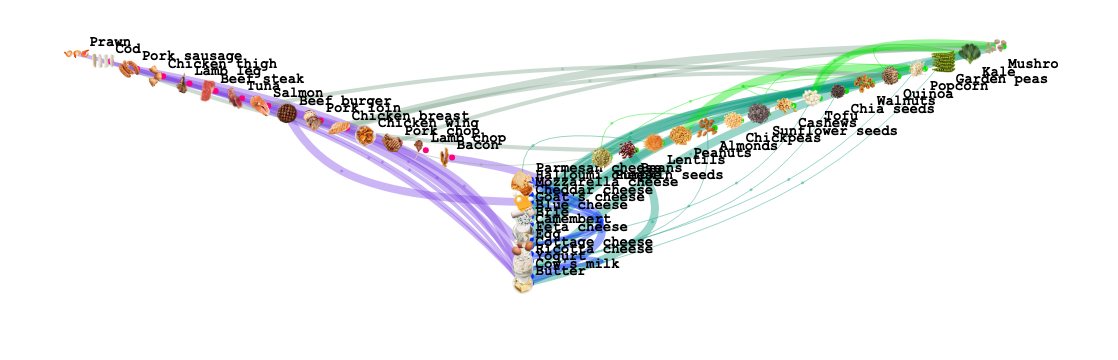

In [102]:
# printing the chart

fig = go.Figure(
    data= edge_lines + edge_labels + [node_trace], #edge_lines and labels are lists
    layout=go.Layout(
        title='',
        showlegend=False,
        hovermode='closest',
        margin=dict(b=60, l=30, r=60, t=30),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white'
    )
)

# adding the image in the chart
for _, row in df_nodes.iterrows():
    img_url = row.get('image_url', None)
    if isinstance(img_url, str) and img_url.startswith('http'):
        fig.add_layout_image(
            dict(
                source=img_url,
                x=row['x'],
                y=row['y'],
                xref="x",
                yref="y",
                sizex=10,
                sizey=30,
                xanchor="center",
                yanchor="middle",
                layer="above"
            )
        )

fig.show()

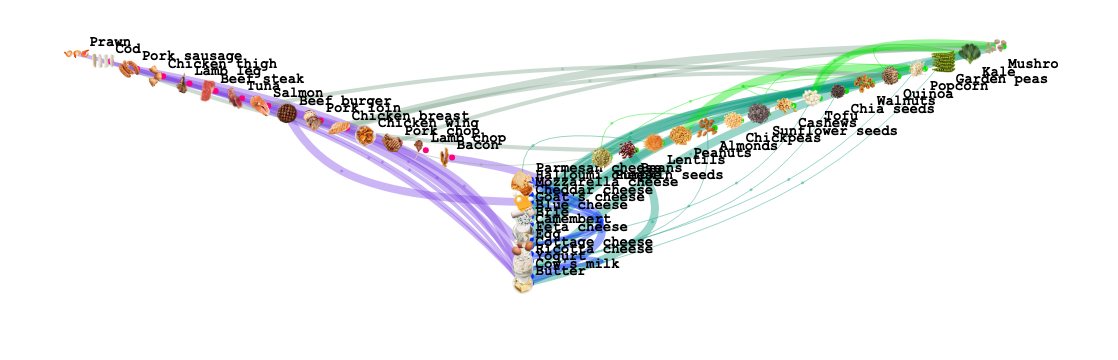

In [104]:
# hover layout

fig.for_each_trace(
    lambda trace: trace.update(
        hoverlabel=dict(
        font_size=14,
        font_family='Courier New',
        font_color='black',
        bordercolor='rgba(0,0,0,0)'
        )
    )
)

In [106]:
fig.write_html("food_network_5.html", include_plotlyjs='cdn')

In [108]:
fig.write_image("food_network_2.svg")